In [1]:
from sam_enhancer import SAME

In [2]:
model = SAME(model_path="sam2.1_t.pt")

In [3]:
dataset_dir = '../../../Datasets/SERUSO_DATASETS/test_set/images/'
dataset_dir_mask = '../../../Datasets/SERUSO_DATASETS/test_set/masks/'
save_dir = "../experiments/SAM/masks/"
save_dir_2 = "../experiments/SAM/enhanced/"
coarse_mask_path = "../experiments/Puzzle-CAM/cams/maps/"
spec_img = "before/before-video-000/"

In [ ]:
model.compute_masks(origin_path= dataset_dir + spec_img, destination_path= save_dir+ spec_img)

In [6]:
import numpy as np

mask_origin_path = coarse_mask_path + spec_img + "frame_0002.npz"

loaded_npz = np.load(mask_origin_path)
print(loaded_npz.files)

masks_sam = np.load(mask_sam_path)["array"]

['array']


In [ ]:
model.merge_masks(origin_path= coarse_mask_path + spec_img, sam_path= save_dir+ spec_img, destination_path= save_dir_2 + spec_img, number_classes=3)

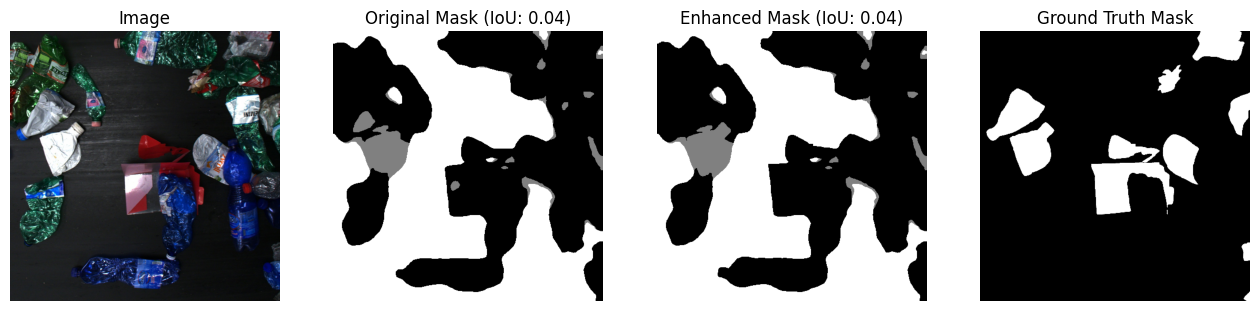

In [6]:
super_path = "frame_0004.npz"
image = dataset_dir + spec_img + "frame_0004.jpg" # image
enhance = save_dir_2 + spec_img + super_path # enhance
coarse = coarse_mask_path + spec_img + super_path # coarse
original = dataset_dir_mask + spec_img + "frame_0004.jpg" # original

SAME.plot_file(image, coarse, enhance, original)


# SAME.plot_file("frame-0001.jpg", "dataset/final/mask/frame-0001.npz", "/home/leonardo/Seruso_dataset/dataset/final/SAM/enhanced/frame-0001.npz", "dataset/test_set/masks/before/before-video-000/frame-0001.jpg")
# SAME.plot_file("dataset/final/image/frame-0008.jpg", "dataset/final/mask/frame-0008.npz", "/home/leonardo/Seruso_dataset/dataset/final/SAM/enhanced/frame-0008.npz", "dataset/test_set/masks/before/before-video-002/frame-0008.jpg")